## Exercise Geomechanics and Structural Geology (Feb 25, 2026)

- Nanda Njh HA.
- Pablo Oliver (6483186)
- Lennard Stoeck

### *Part 1: Mohr-Coulomb Diagram*



### *Task 1*

Construct the Mohr-Coulomb failure criteria for the following series of experiments on the Red Felser sandstone. The Red Felser sandstone is the analogue to the Groningen reservoir sandstone. First do a linear best fit plotting the sigma 3 – sigma 1 data and from this best fit determine the cohesion and angle of internal friction for this dataset.

Red Felser Sandstone Triaxial Compression Experiments (DeepNL – Milad Naderloo 2020):

| Confining Pressure / Sigma 3 (MPa) | Sigma 1 (MPa) |
|------------------------------------|---------------|
| 0                                  | 36            |
| 5                                  | 79            |
| 10                                 | 118           |
| 20                                 | 174           |
| 40                                 | 246           |



### *Solution:*

Mohr-Coulomb formulas: $$σ₁ = a·σ₃ + y_int$$

The slope $a$ of the best fit represents the passive earth pressure coefficient:

$$a = \tan^2\left(45° + \frac{\varphi}{2}\right) = \frac{1 + \sin\varphi}{1 - \sin\varphi}$$


Solving for friction angle:

$$\sin\varphi = \frac{a-1}{a+1} \quad \Rightarrow \quad \varphi = \arcsin\left(\frac{a-1}{a+1}\right)$$

Cohesion from intercept:

$$C = \frac{y_{int}}{2\sqrt{a}}$$

---
Other way for friction angle: 


$$\sqrt{a} = \tan\left(45^\circ + \frac{\varphi}{2}\right)$$





$$\tan^{-1}(\sqrt{a}) = 45^\circ + \frac{\varphi}{2}$$



$$
\varphi = 2\left(\tan^{-1}(\sqrt{a}) - 45^\circ\right)
$$

Other way for Cohesion from intercept : 



$$
b = 2C \tan\left(45^\circ + \frac{\varphi}{2}\right)
$$


$$
C = \frac{b}{2 \tan\left(45^\circ + \frac{\varphi}{2}\right)}
$$





In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Experimental data
sigma_3 = np.array([0, 5, 10, 20, 40])  # MPa (Confining Pressure)
sigma_1 = np.array([36, 79, 118, 174, 246])  # MPa (Major Principal Stress)

In [14]:
# Linear best fit
slope, intercept, r_value, p_value, std_err = linregress(sigma_3, sigma_1) #calculating the linear regression parameters
a = slope  #finding a (slope)
y_int = intercept   #finsing intercept

print(f"Linear fit: sigma_1 = {a:.3f}·sigma_3 + {y_int:.2f}")
print(f"R^2 = {r_value**2:.4f}")

Linear fit: sigma_1 = 5.100·sigma_3 + 54.10
R^2 = 0.9644


Calculation of cohesion and angle of internal friction form the slope and intercept 

In [15]:
print(a)


phi = 2 * (np.degrees(np.arctan(np.sqrt(a))) - 45)
print(f"Friction angle (phi) = {phi:.2f} degrees")
C = y_int / (2 * np.tan(np.radians(45 + phi/2)))
print(f"Cohesion (C) = {C:.2f} MPa")

5.1
Friction angle (phi) = 42.23 degrees
Cohesion (C) = 11.98 MPa


Other way to do it : 

In [16]:
# Calculating friction angle φ using standard Mohr-Coulomb formula
sin_phi = (a - 1) / (a + 1)
phi_rad = np.arcsin(sin_phi)
phi_deg = np.degrees(phi_rad)


# Calculating cohesion C
C = y_int / (2 * np.sqrt(a))

print(f"\nMohr-Coulomb Parameters:")
print(f"Cohesion (C) = {C:.2f} MPa")
print(f"Friction Angle (φ) = {phi_deg:.2f}°")


Mohr-Coulomb Parameters:
Cohesion (C) = 11.98 MPa
Friction Angle (φ) = 42.23°


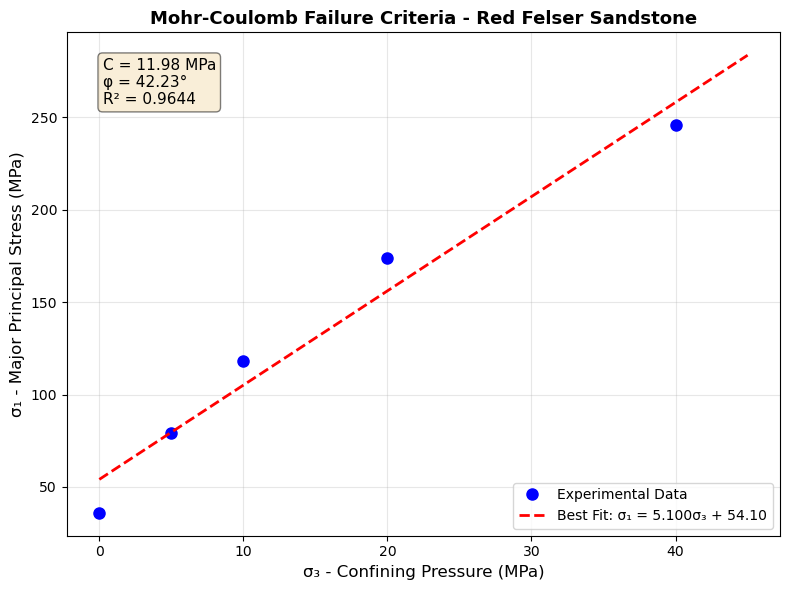

In [17]:
#Visualization of the data and the best fit line

# Plot
fig, ax = plt.subplots(figsize=(8, 6))


# Data points
ax.plot(sigma_3, sigma_1, 'o', markersize=8, label='Experimental Data', color='blue')


# Best fit line
sigma_3_fit = np.linspace(0, 45, 100)
sigma_1_fit = a * sigma_3_fit + y_int
ax.plot(sigma_3_fit, sigma_1_fit, 'r--', linewidth=2, label=f'Best Fit: σ₁ = {a:.3f}σ₃ + {y_int:.2f}')


# Labels and formatting
ax.set_xlabel('σ₃ - Confining Pressure (MPa)', fontsize=12)
ax.set_ylabel('σ₁ - Major Principal Stress (MPa)', fontsize=12)
ax.set_title('Mohr-Coulomb Failure Criteria - Red Felser Sandstone', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()


# Add text box with results
textstr = f'C = {C:.2f} MPa\nφ = {phi_deg:.2f}°\nR² = {r_value**2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

Based on the calculation, the cohesion (C) = 11.98 MPa and friction angle (φ) = 42.23°. The linear regression shows good fit (R² = 0.964) confirming the validity of Mohr-Coulomb criterion for this sandstone.
We see that the samples become stronger as the confinement pressure increases as the sigma 1 (value at failure) increases. 

---
### *Task 2*
Construct Pressure vs Shear Strength plot with depth for the different rock types in thepresentation (e.g. Red Felser, Pennant, Darley Dale Sst. etc.).

### *Solution*

Rock Properties from Milad Naderloo et al (2020) paper "_Experimental and numerical investigation of sandstone deformation underycling loading relevant for underground energy storage_" :
- Red Felser sandstone paramaters:
  - Cohession (C) = 11.98 MPa, internal friction angle (φ) = 42.23° (calculated in Task 1)
  - Density = 2.1 gram/cm³ = 2100 kg/m³.
  - Porosity = 21.4%


Rock Properties from Hackston & Rutter (2016) paper _"The Mohr–Coulomb criterion for intact rock strength and friction – a re-evaluation and consideration of failure under polyaxial stresses"_ :
- Pennant sandstone parameters:
  - MC criterion: $\tau = 0.95\sigma_n + 28.40$ , thus we have cohession (C) = 28.40 MPa, friction coefficient (μ) = 0.95, and internal friction angle (φ) = arctan(0.95) = 43.53°.
  - Porosity = 4.57%
  - No explicit info of density in the paper. Density calculation assuming linear correlation with porosity:
    - From Red Felser: $\rho_{grain} = \frac{\rho_{bulk}}{1-\phi} = \frac{2100}{1-0.214} = 2671$ kg/m³
    - Pennant density: $\rho_{Pennant} = \rho_{grain} \times (1-\phi) = 2671 \times (1-0.0457) = 2549$ kg/m³.
- Darley Dale sandstone paramaters:
  - MC criterion: $\tau = 0.64\sigma_n + 22.00$ , thus we have cohession (C) = 22.00 MPa, friction coefficient (μ) = 0.64, and internal friction angle (φ) = arctan(0.64) = 32.62°.
  - Porosity = 13.5%
  - No explicit info of density in the paper. Density calculation assuming linear correlation with porosity:
    - Darley Dale density: $\rho_{Darley} = \rho_{grain} \times (1-\phi) = 2671 \times (1-0.135) = 2310$ kg/m³.




**Formula of Calculations:**

At depth $z$, the normal stress due to overburden is:
$$\sigma_n = \rho \cdot g \cdot z$$

Mohr-Coulomb Failure Criterion:
$$\tau = C + \sigma_n \cdot \tan(\varphi)$$

Combining with Mohr-Coulomb criterion:
$$\tau(z) = C + \rho \cdot g \cdot z \cdot \tan(\varphi)$$

where:
- $\tau$ = shear strength (MPa)
- $C$ = cohesion (MPa)
- $\sigma_n$ = normal stress (MPa)
- $\varphi$ = friction angle (degrees)
- $\rho$ = rock density (kg/m³)
- $g$ = 9.81 m/s² (gravitational acceleration)
- $z$ = depth (m)


In [18]:
# Rock properties data
rock_data = {
    'Pennant': {
        'C': 28.40,
        'phi': np.degrees(np.arctan(0.95)),
        'rho': 2549,
        'porosity': 4.57,
        'color': 'blue'
    },
    'Darley Dale': {
        'C': 22.00,
        'phi': np.degrees(np.arctan(0.64)),
        'rho': 2310,
        'porosity': 13.5,
        'color': 'green'
    },
    'Red Felser': {
        'C': 11.98,
        'phi': 42.23,
        'rho': 2100,
        'porosity': 21.4,
        'color': 'red'
    }
}

# Display summary
print(f"{'Rock Type':<15} {'C (MPa)':<10} {'φ (°)':<10} {'ρ (kg/m³)':<10} {'porosity (%)':<10}")
print("-" * 60)
for name, props in rock_data.items():
    print(f"{name:<15} {props['C']:<10.2f} {props['phi']:<10.2f} {props['rho']:<10} {props['porosity']:<10.2f}")

Rock Type       C (MPa)    φ (°)      ρ (kg/m³)  porosity (%)
------------------------------------------------------------
Pennant         28.40      43.53      2549       4.57      
Darley Dale     22.00      32.62      2310       13.50     
Red Felser      11.98      42.23      2100       21.40     


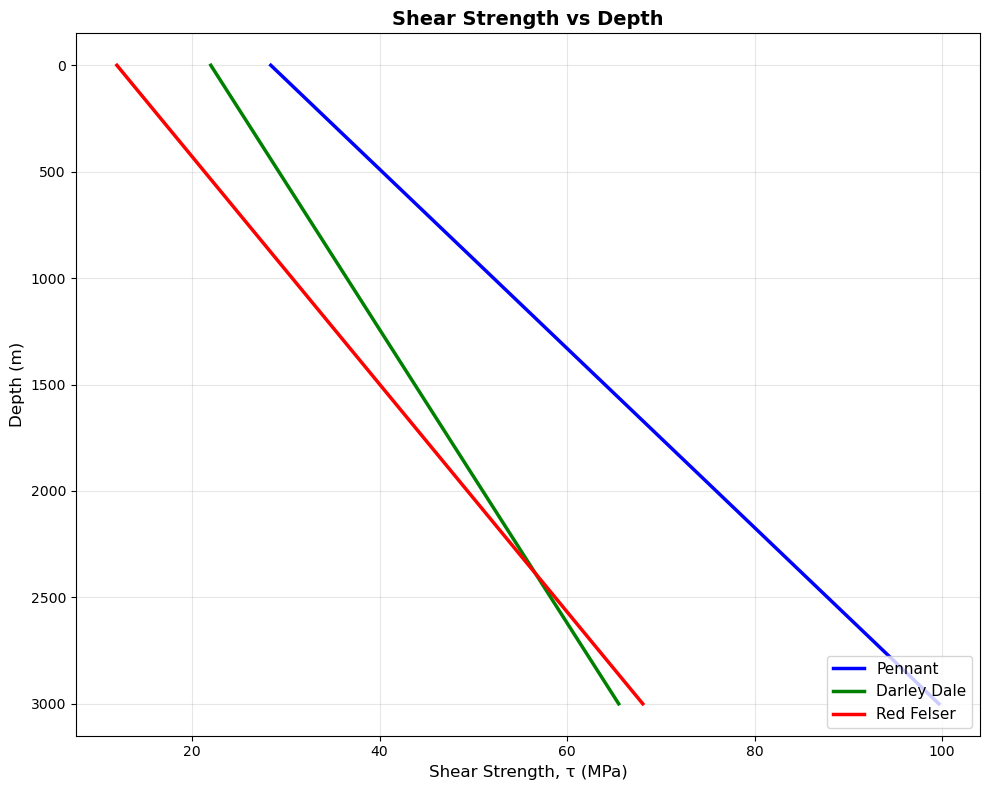

In [19]:
#Shear Strength vs Depth Calculation

# Parameters
depth = np.linspace(0, 3000, 100)
g = 9.81

# Calculate and plot shear strength vs depth
plt.figure(figsize=(10, 8))

for name, props in rock_data.items():
    C = props['C']
    phi = np.radians(props['phi'])
    rho = props['rho']
    
    sigma_n = rho * g * depth / 1e6
    tau = C + sigma_n * np.tan(phi)
    
    plt.plot(tau, depth, linewidth=2.5, label=name, color=props['color'])

plt.xlabel('Shear Strength, τ (MPa)', fontsize=12)
plt.ylabel('Depth (m)', fontsize=12)
plt.title('Shear Strength vs Depth', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='lower right')
plt.tight_layout()
plt.show()

**Interpretation**: lower porosity generally correlates with higher rock strength, as demonstrated by Pennant sandstone (4.57% porosity) exhibiting the highest cohesion (28.40 MPa) and steepest strength gradient with depth compared to Darley Dale (13.5%) and Red Felser (21.4%).

---

### *Task 3*
</div>
Evaluate the sigma 1 and sigma 3 for rocks that have a typical density of 2.65 g/cm3 and a
Poisson’s ratio of 0.25 under the assumption you are in a normal faulting regime where the
maximum principal stress (sigma 1) is vertical.

<u>3a) Evaluate what happens when the Poisson’s ratio is variable</u>.

**Solution:**

Normal faultime regime, so : 

- σ₁ = vertical stress \( S_v \)
- σ₃ = minimum horizontal stress \( S_{hmin} \)

Given:

- Density (ρ) = 2.65 g/cm³
- Poisson’s ratio (ν) = 0.25





The vertical stress at depth  z  is:

$$
\sigma_1(z) = S_v(z) = \rho g z
$$

 
and the horizontal stress : 

$$
\sigma_3(z) = \frac{\nu}{1 - \nu} \sigma_1(z)
$$


Substituting:

$$
\sigma_3(z) = \frac{\nu}{1 - \nu} \rho g z
$$


So what happens when the Poisson's ratio is variable ?  


Stress Ratio: 

From the previous derivation:
$$
σ3 / σ1 = ν / (1 − ν)
$$

If ν increases: 

- The ratio σ3 / σ1 increases.
- The horizontal stress σ3 becomes closer to the vertical stress σ1
- The differential stress (σ1 − σ3) decreases.


If ν decreases: 

- The ratio σ3 / σ1 decreases.
- The horizontal stress becomes smaller relative to the vertical stress.
- The differential stress (σ1 − σ3) increases.



This means that for very small ν (brittle, highly compressible rock which does not expand a lot on the horizontal direction) 
σ3 is much smaller than σ1, the differential stress (σ1 − σ3) is big so the rock reaches quicker the fail point because it cannot expand on the sides.  
  
For a big ν (rock which deforms a lot more on the horizontal direction when a vertical stress is applied), the rock will resist much better to a vertical load because it can expand so the failure point comes much later. 

A simulation under different numbers of Poission's ratio is performed as follow:

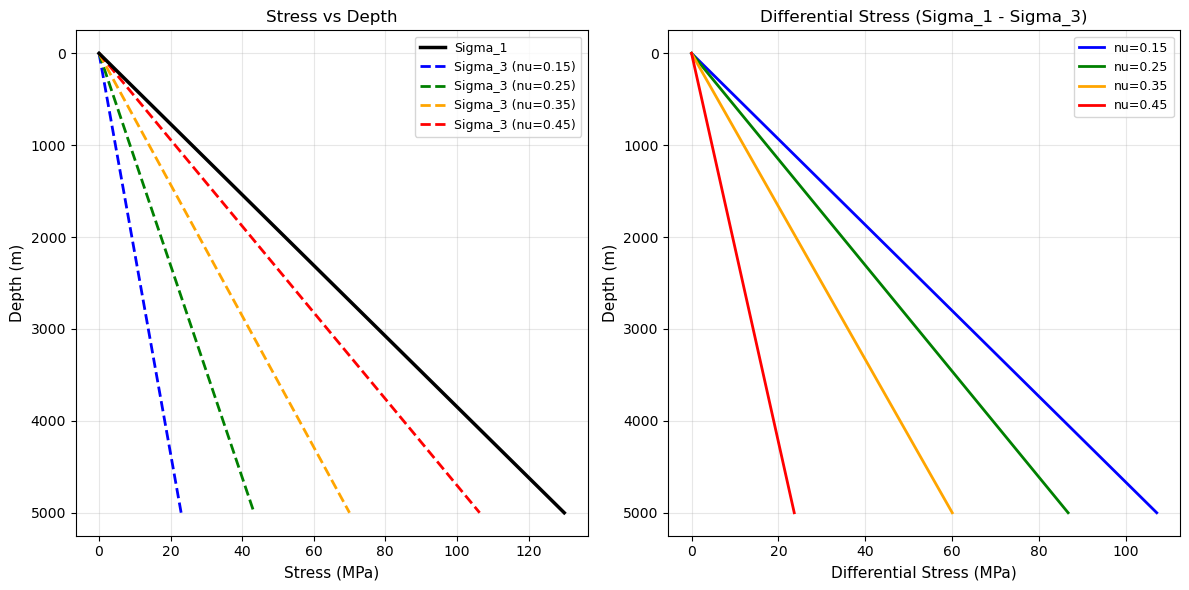

In [20]:
# Task 3a: Variable Poisson's ratio

import numpy as np
import matplotlib.pyplot as plt

rho = 2650
g = 9.81
z = np.linspace(0, 5000, 100)
nu_values = [0.15, 0.25, 0.35, 0.45]
colors = ['blue', 'green', 'orange', 'red']

sigma_1 = rho * g * z / 1e6

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Sigma_1 and Sigma_3
ax1 = axes[0]
ax1.plot(sigma_1, z, 'k-', linewidth=2.5, label='Sigma_1', zorder=5)
for nu, color in zip(nu_values, colors):
    sigma_3 = (nu / (1 - nu)) * sigma_1
    ax1.plot(sigma_3, z, '--', linewidth=2, color=color, label=f'Sigma_3 (nu={nu})')
ax1.set_xlabel('Stress (MPa)', fontsize=11)
ax1.set_ylabel('Depth (m)', fontsize=11)
ax1.invert_yaxis()
ax1.grid(alpha=0.3)
ax1.legend(fontsize=9)
ax1.set_title('Stress vs Depth', fontsize=12)

# Plot 2: Differential Stress
ax2 = axes[1]
for nu, color in zip(nu_values, colors):
    sigma_3 = (nu / (1 - nu)) * sigma_1
    diff = sigma_1 - sigma_3
    ax2.plot(diff, z, linewidth=2, color=color, label=f'nu={nu}')
ax2.set_xlabel('Differential Stress (MPa)', fontsize=11)
ax2.set_ylabel('Depth (m)', fontsize=11)
ax2.invert_yaxis()
ax2.grid(alpha=0.3)
ax2.legend(fontsize=9)
ax2.set_title('Differential Stress (Sigma_1 - Sigma_3)', fontsize=12)

plt.tight_layout()
plt.show()

*Interpretation:* higher Poisson's ratio leads to higher horizontal stress (sigma 3) and lower differential stress, making rock less prone to failure. This demonstrates that brittle rocks (low Poisson's ratio) experience larger differential stress and reach failure more easily than ductile rocks (high Poisson's ratio) under the same vertical load.

---






<u> Part (3b): Evaluate what happens when the porosity is decreasing from 40% at the Earth Surface to 0% at 5 km depth under the assumption the whole system contains of sandstones (density of non-porous sandstone is 2.65 g/cm³)</u>

**Solution:** Continuing from Task 3 with same parameters (ν = 0.25, normal faulting regime), we analyze a progressive compaction: porosity decreases from 40% at surface to 0% at 5 km depth.

Under an assumption that the porosity decreases linearly with depth:
$$\phi(z) = 0.40 \left(1 - \frac{z}{5000}\right)$$

Then the bulk density will vary with porosity:
$$\rho(z) = \rho_{grain} (1 - \phi(z)) = 2650 (1 - \phi(z))$$

This gives:
- At the Earth surface (higher porosity) $$(z=0): ρ(0) = 2650 × (1-0.40) = 1590 kg/m³$$
- At 5 km depth (fully compacted): $$ρ(5000) = 2650 × (1-0) = 2650 kg/m³$$

To calculate vertical stress (sigma 1), we use the average of density, as follow :
$$\sigma_1(z) = \rho_{avg}(z) \cdot g \cdot z \quad \text{where} \quad \rho_{avg}(z) = \frac{\rho(0) + \rho(z)}{2}$$

Horizontal stress (normal faulting, ν=0.25):
$$\sigma_3(z) = \frac{\nu}{1-\nu} \sigma_1(z) = \frac{1}{3} \sigma_1(z)$$

The formulas above show that progressive compaction creates depth-dependent density, requiring the average density method to properly account for the varying overburden weight. This differs from assuming constant 0% porosity, which can either underestimate or overestimate the actual stress.

A simulation of progressive compaction is performed as follow:

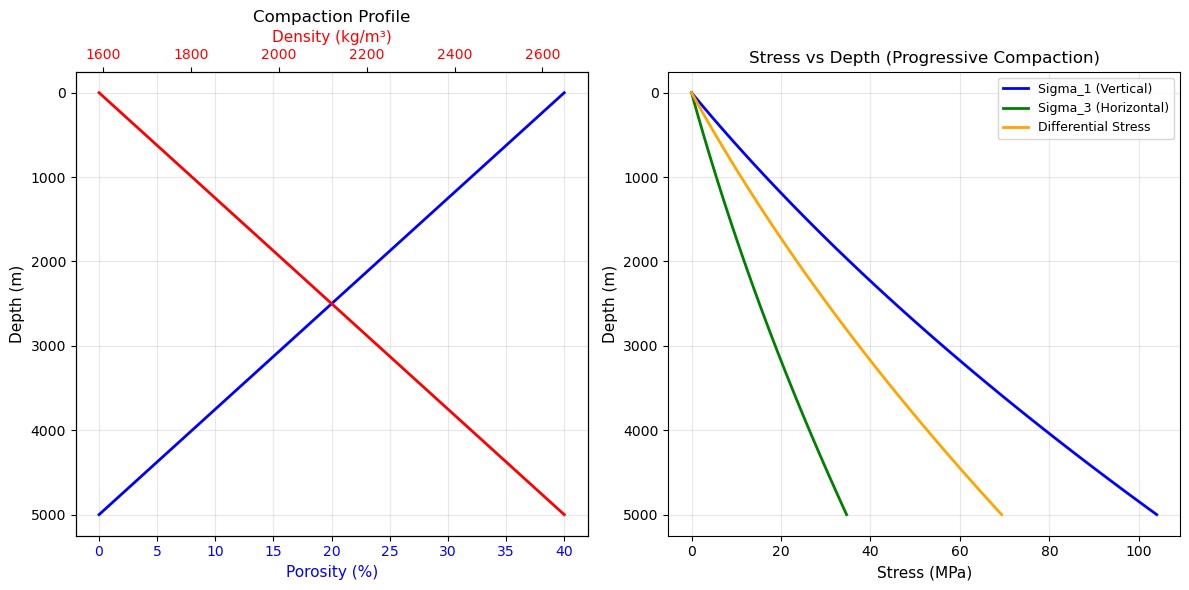

In [23]:
# Task 3b: Decreasing porosity with depth

import numpy as np
import matplotlib.pyplot as plt

rho_grain = 2650
phi_surface = 0.40
z_max = 5000
nu = 0.25
g = 9.81

z = np.linspace(0, 5000, 100)

# Calculate porosity, density, and average density with depth
phi_z = phi_surface * (1 - z / z_max)
rho_z = rho_grain * (1 - phi_z)
rho_avg = (rho_grain * (1 - phi_surface) + rho_z) / 2

# Progressive compaction stresses
sigma_1 = rho_avg * g * z / 1e6
sigma_3 = (nu / (1 - nu)) * sigma_1
diff_stress = sigma_1 - sigma_3

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Compaction profile (porosity and density vs depth)
ax1 = axes[0]
ax1_twin = ax1.twiny()
ax1.plot(phi_z * 100, z, 'b-', linewidth=2)
ax1.set_xlabel('Porosity (%)', fontsize=11, color='b')
ax1.tick_params(axis='x', labelcolor='b')
ax1.set_ylabel('Depth (m)', fontsize=11)
ax1.invert_yaxis()
ax1.grid(alpha=0.3)

ax1_twin.plot(rho_z, z, 'r-', linewidth=2)
ax1_twin.set_xlabel('Density (kg/m³)', fontsize=11, color='r')
ax1_twin.tick_params(axis='x', labelcolor='r')
ax1.set_title('Compaction Profile', fontsize=12)

# Plot 2: Stress with depth (progressive compaction)
ax2 = axes[1]
ax2.plot(sigma_1, z, 'b-', linewidth=2, label='Sigma_1 (Vertical)')
ax2.plot(sigma_3, z, 'g-', linewidth=2, label='Sigma_3 (Horizontal)')
ax2.plot(diff_stress, z, 'orange', linewidth=2, label='Differential Stress')

ax2.set_xlabel('Stress (MPa)', fontsize=11)
ax2.set_ylabel('Depth (m)', fontsize=11)
ax2.invert_yaxis()
ax2.grid(alpha=0.3)
ax2.legend(fontsize=9, loc='upper right')
ax2.set_title('Stress vs Depth (Progressive Compaction)', fontsize=12)

plt.tight_layout()
plt.show()

*Interpretation:* the progressive compaction model (porosity 40%→0%) shows that vertical stress (σ₁) reaches 103.96 MPa at 5 km depth. Horizontal stress (σ₃) = σ₁/3 following normal faulting regime with ν=0.25. Left panel shows the compaction profile: porosity decreases linearly while density increases from 1590 kg/m³ (surface) to 2650 kg/m³ (5 km depth). Differential stress (σ₁-σ₃) increases linearly with depth, reaching 69.31 MPa at 5 km. 